In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import normaltest
from scipy.stats import rankdata
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib as mpl
import plotly.express as px
import folium
mpl.rcParams['agg.path.chunksize'] = 300000
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
pio.renderers.default = "notebook_connected"

In [41]:
wake_lat_lon = [35.8032, -78.5661]
df_path = 'assets/updated_house_df.csv'
int_rate_path = 'assets/us_int_rate.csv'

year_list = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', 
             '2007', '2008', '2009', '2010', '2011', '2012', '2013', 
             '2014', '2015', '2016', '2017', '2018', '2019', '2020', 
             '2021']
col_name_list = ['building_median', 'sale_price_median', 'building_mean', 'sale_price_mean', 'land_mean']
wake_lat_lon = [35.7877, -78.6447]
zoom_start = 12
fill_color_1 = 'YlGn'
fill_color_2 = 'Blues'

In [3]:
def read_csv(file_path, print_columns=False):
    """Read csv files and return a dataframe
    
    Args:
        file_path (str): path of the csv file
        print_columns (bool): print columns of the dataframe (default: False)
    """
    df = pd.read_csv(file_path)
    if print_columns:
        print(df.columns)
    print(df.shape)
    print("The data is loaded successfully!")
    return df

In [4]:
def int_rate(path, df):
    int_df = read_csv(path)
    int_df.drop(columns=['Unnamed: 0'], inplace=True)
    int_df.rename(columns={'year':'date'},inplace=True)

    int_df['date'] = int_df['date'].astype(str)
    int_df['year'] = int_df['date'].apply(lambda x: x.split('-')[0])
    return int_df

In [5]:
def price_summary(df, int_rate_df):
    df['year'] = df['deed_date'].apply(lambda x: x.split('-')[0])

    house_mean_price_dict = {}
    house_median_price_dict = {}
    building_mean_price_dict = {}
    building_median_price_dict = {}
    land_mean_price_dict = {}
    land_median_price_dict = {}
    interest_rate_dict = {}
    mort_rate_dict = {}
    unemploy_rate_dict = {}
    pop_growth_rate_dict = {}
    lumber_price_dict = {}
    metals_price_dict = {}
    manufactured_house_number_dict = {}
    hai_dict = {}
    wake_supply_index_dict = {}
    wake_demand_index_dict = {}
    crime_dict = {}

    for year in year_list:
        house_mean_price_dict[year] = 0
        house_mean_price_dict[year] = (df[df['year'] == year]['total_sale_price'].mean())
        house_median_price_dict[year] = 0
        house_median_price_dict[year] = (df[df['year'] == year]['total_sale_price'].median())
        building_mean_price_dict[year] = 0
        building_mean_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].mean())
        building_median_price_dict[year] = 0
        building_median_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].median())
        land_mean_price_dict[year] = 0
        land_mean_price_dict[year] = (df[df['year'] == year]['land_sale_price'].mean())
        land_median_price_dict[year] = 0
        land_median_price_dict[year] = (df[df['year'] == year]['land_sale_price'].median())
        interest_rate_dict[year] = 0
        interest_rate_dict[year] = (int_rate_df[int_rate_df['year'] == year]['int_rate'].values[0])

        mort_rate_dict[year] = 0
        mort_rate_dict[year] = (df[df['year'] == year]['mort_rate'].values[0])
        unemploy_rate_dict[year] = 0
        unemploy_rate_dict[year] = (df[df['year'] == year]['unemploy_rate'].values[0])
        pop_growth_rate_dict[year] = 0
        pop_growth_rate_dict[year] = (df[df['year'] == year]['pop_growth_rate'].values[0])
        lumber_price_dict[year] = 0
        lumber_price_dict[year] = (df[df['year'] == year]['lumber_price'].values[0])
        metals_price_dict[year] = 0
        metals_price_dict[year] = (df[df['year'] == year]['metals_price'].values[0])
        manufactured_house_number_dict['year'] = 0
        # manufactured_house_number_dict['year'] = (df[df['year'] == year]['manufactured_house_number'].values[0])
        # hai_dict[year] = 0
        # hai_dict[year] = (df[df['year'] == year]['hai'].values[0])
        # wake_supply_index_dict[year] = 0
        # wake_supply_index_dict[year] = (df[df['year'] == 'year']['wake_supply_index'][0])
        # wake_demand_index_dict[year] = 0
        # wake_demand_index_dict[year] = (df[df['year'] == 'year']['wake_demand_index'][0])
        crime_dict[year] = 0
        crime_dict[year] = (df[df['year'] == year]['crime'].values[0])

    price_summary = pd.DataFrame(house_mean_price_dict.values(), house_mean_price_dict.keys(), columns=['sale_price_mean'])
    price_summary['sale_price_median'] = house_median_price_dict.values()
    price_summary['building_mean'] = building_mean_price_dict.values()
    price_summary['building_median'] = building_median_price_dict.values()
    price_summary['land_mean'] = land_mean_price_dict.values()
    price_summary['land_median'] = land_median_price_dict.values()
    price_summary['interest_rate'] = interest_rate_dict.values()
    price_summary['mort_rate'] = mort_rate_dict.values()
    price_summary['unemploy_rate'] = unemploy_rate_dict.values()
    price_summary['pop_growth_rate'] = pop_growth_rate_dict.values()
    price_summary['lumber_price'] = lumber_price_dict.values()
    price_summary['metals_price'] = metals_price_dict.values()
    # price_summary['manufactured_house_number'] = manufactured_house_number_dict.values()
    # price_summary['hai'] = hai_dict.values()
    # price_summary['wake_supply_index'] = wake_supply_index_dict.values()
    # price_summary['wake_demand_index'] = wake_demand_index_dict.values()
    price_summary['crime'] = crime_dict.values()

    price_summary.reset_index(inplace=True)
    price_summary.rename(columns={'index':'year'}, inplace=True)
    price_summary.sort_values('year', inplace=True)
    price_summary.reset_index(drop=True, inplace=True)
    print(price_summary.shape)
    print("Price summary dataframe created.")
    return price_summary

In [6]:
def create_line_chart_all(df, col_name, plt_style='seaborn-darkgrid', get_cmap='Set1'):
    plt.style.use(plt_style)
    palette = plt.get_cmap(get_cmap)
    plt.figure(figsize=(18,8))
    for i in col_name:
        plt.plot(df['year'], df[i], label=i)

    plt.legend()
    plt.title('Median and mean prices')
    plt.xlabel('Year')
    plt.ylabel('Price')
    return plt.show()

In [7]:
def frequency_plots(df, frequency_var, plt_style='seaborn-darkgrid', get_cmap='Set1', rotation=90):
    for var in frequency_var:
        if var != 'utility':
            counts = df[var].value_counts().sort_values()
            y_pos = np.arange(len(counts.index))

            plt.style.use(plt_style)
            palette = plt.get_cmap(get_cmap)
            plt.figure(figsize=(12,5))
            plt.bar(y_pos, counts.values, color=palette(3))
            plt.title(f'{var} counts')
            plt.xlabel(f'{var}')
            plt.ylabel('Count')
            plt.xticks(y_pos, counts.index, rotation=rotation)
            for i in range(len(y_pos)):
                plt.text(x = y_pos[i]-0.3 , y = counts.values[i]+0.1, s = counts.values[i], size = 10)
            plt.subplots_adjust(bottom= 0.2, top = 0.98)
            plt.savefig(f'{var}.png', bbox_inches='tight')

        else: 
            counts_df = df[['all', 'electric','water','gas','sewer']]
            counts = counts_df.sum()
            y_pos = np.arange(len(counts.index))

            plt.style.use(plt_style)
            palette = plt.get_cmap(get_cmap)
            plt.figure(figsize=(12,5))
            plt.bar(y_pos, counts.values, color=palette(3))
            plt.title('Utilities counts')
            plt.xlabel('Utilities')
            plt.ylabel('Count')
            plt.xticks(y_pos, counts.index, rotation=rotation-35)
            for i in range(len(y_pos)):
                plt.text(x = y_pos[i]-0.1 , y = counts.values[i]+0.9, s = counts.values[i], size = 10)
            plt.subplots_adjust(bottom= 0.2, top = 0.98)
            plt.savefig(f'{var}.png', bbox_inches='tight')
    
    return plt.show()

In [8]:
def house_price_hist(df, variable_1, variable_2, data, plt_style='seaborn-darkgrid', get_cmap='Set1', rotation=90):

    if data == 'mean':
        mean_counts = df.groupby(variable_2)[variable_1].mean().sort_values()
        y_pos = np.arange(len(mean_counts.index))

        plt.style.use(plt_style)
        palette = plt.get_cmap(get_cmap)
        plt.figure(figsize=(12,5))
        plt.bar(y_pos, mean_counts.values, color=palette(3))
        plt.title(f'{data} price of houses by {variable_2}')
        plt.xlabel(f'{variable_2}')
        plt.ylabel(f'{data} price')
        plt.xticks(y_pos, mean_counts.index, rotation=rotation)
        for i in range(len(y_pos)):
            plt.text(x = y_pos[i]-0.3 , y = mean_counts.values[i]+0.9, s = int(mean_counts.values[i]), size = 10)
        plt.subplots_adjust(bottom= 0.2, top = 0.98)
        plt.savefig(f'{variable_1}.png', bbox_inches='tight')
    elif data == 'median':
        median_counts = df.groupby(variable_2)[variable_1].median().sort_values()
        y_pos = np.arange(len(median_counts.index))

        plt.style.use(plt_style)
        palette = plt.get_cmap(get_cmap)
        plt.figure(figsize=(12,5))
        plt.bar(y_pos, median_counts.values, color=palette(3))
        plt.title(f'{data} price of houses by {variable_2}')
        plt.xlabel(f'{variable_2}')
        plt.ylabel(f'{data} price')
        plt.xticks(y_pos, median_counts.index, rotation=rotation)
        for i in range(len(y_pos)):
            plt.text(x = y_pos[i]-0.3 , y = median_counts.values[i]+0.9, s = int(median_counts.values[i]), size = 10)
        plt.subplots_adjust(bottom= 0.2, top = 0.98)
        plt.savefig(f'{variable_1}.png', bbox_inches='tight')
    return plt.show()

In [9]:
def get_new_df(df):
    new_df = df[['year', 'physical_city', 'total_sale_price']]
    new_df['physical_city'] = new_df['physical_city'].str.upper()
    new_df = new_df.sort_values(['physical_city', 'year'])
    return new_df

def get_countries(df):
    new_df = get_new_df(df)

    COUNTRIES = new_df["physical_city"].unique()
    return COUNTRIES

def add_label(x, y, fontsize, ax):
    PAD = 0.5
    ax.annotate(
        f"${int(y)} in\n{str(int(x))}", 
        xy=(x, y - PAD), 
        ha="center", 
        va="bottom",
        fontsize=fontsize,
        fontname="Lato",
        zorder=12
    )

def plot_country(df, country, data, ax, method):
    COUNTRIES = get_countries(df)
    for country_inner in COUNTRIES:
        d = data[data["physical_city"] == country_inner]
        if method == 'mean':
            d_grouped = d.groupby(['year', 'physical_city'])['total_sale_price'].mean()
        elif method == 'median':
            d_grouped = d.groupby(['year', 'physical_city'])['total_sale_price'].median()
        d_df = pd.DataFrame(
                            {'year': d_grouped.index.get_level_values(0), 
                             'physical_city': d_grouped.index.get_level_values(1), 
                             'price': d_grouped.values}
                             )
        x = d_df["year"].values
        y = d_df["price"].values

        if country_inner == country:
            ax.plot(x, y, color="#0b53c1", lw=2.4, zorder=10)
            ax.scatter(x[::3], y[::3], fc="w", ec="#0b53c1", s=60, lw=2.4, zorder=12)
            add_label(x[0], y[0], 10, ax)
            add_label(x[-1], y[-1], 10, ax)
        else:
            ax.plot(x, y, color="#D3D3D3", lw=1.5)

    ax.set_yticks([])
    ax.set_xticks(np.arange(0, len(x)+1, 5))

    ax.tick_params(bottom=False)
    ax.set_frame_on(False)

    ax.set_title(country, fontsize=14, fontweight=500)
    plt.savefig('line chart by city.png', bbox_inches='tight')

    return ax

In [10]:
def all_mean_price_line(df, plt_style='seaborn-darkgrid', get_cmap='Set1'):
    new_df = df[['year', 'physical_city', 'total_sale_price']]
    grouped_new_df = new_df.groupby(['year','physical_city'])['total_sale_price'].mean()
    grouped_new_df = grouped_new_df.unstack()
    grouped_new_df.columns.name = 'physical_city'

    plt.style.use(plt_style)
    palette = plt.get_cmap(get_cmap)
    fig,ax = plt.subplots(figsize=(18,8))
    num = 0
    for column in grouped_new_df:
        num += 1
        ax.plot(
                grouped_new_df.index, 
                grouped_new_df[column], 
                marker='', 
                color=palette(num), 
                label=column
                )
    plt.legend(loc=2, ncol=2)
    plt.title('Mean price of houses by city')
    plt.xlabel('Year')
    plt.ylabel('Mean price')
    return plt.show()


In [11]:
def get_grouped_zip_df(df):
    zip_df = df[['physical_zip_code', 'physical_city', 'total_sale_price']]
    grouped_zip_df = pd.DataFrame()
    grouped_zip_df['city'] = zip_df.groupby('physical_zip_code')['physical_city'].first()
    grouped_zip_df['mean'] = zip_df.groupby(['physical_zip_code', 'physical_city'])['total_sale_price'].transform('mean')
    grouped_zip_df['median'] = zip_df.groupby(['physical_zip_code', 'physical_city'])['total_sale_price'].transform('median')
    grouped_zip_df.reset_index(inplace=True)

    grouped_zip_df['city'] = grouped_zip_df['city'].str.upper()
    grouped_zip_df['lat'] = 0
    grouped_zip_df['lon'] = 0

    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27502, 'lat'] = 35.7178
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27502, 'lon'] = -78.9175
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27511, 'lat'] = 35.7698
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27511, 'lon'] = -78.7816
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27513, 'lat'] = 35.8129
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27513, 'lon'] = -78.7816
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27518, 'lat'] = 35.7315
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27518, 'lon'] = -78.7760
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27519, 'lat'] = 35.8020
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27519, 'lon'] = -78.8949
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27523, 'lat'] = 35.7749
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27523, 'lon'] = -78.9515
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27526, 'lat'] = 35.5843
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27526, 'lon'] = -78.8000
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27529, 'lat'] = 35.6545
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27529, 'lon'] = -78.5888
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27539, 'lat'] = 35.6814
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27539, 'lon'] = -78.7590
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27540, 'lat'] = 35.6251
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27540, 'lon'] = -78.8496
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27545, 'lat'] = 35.7848
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27545, 'lon'] = -78.4866
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27560, 'lat'] = 35.8387
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27560, 'lon'] = -78.8269
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27571, 'lat'] = 35.9189
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27571, 'lon'] = -78.4553
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27587, 'lat'] = 35.9990
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27587, 'lon'] = -78.5888
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27591, 'lat'] = 35.7618
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27591, 'lon'] = -78.3615
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27597, 'lat'] = 35.8435
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27597, 'lon'] = -78.3159
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27601, 'lat'] = 35.7744
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27601, 'lon'] = -78.6314
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27603, 'lat'] = 35.6631
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27603, 'lon'] = -78.6796
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27604, 'lat'] = 35.8150
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27604, 'lon'] = -78.5774
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27605, 'lat'] = 35.7928
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27605, 'lon'] = -78.6541
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27606, 'lat'] = 35.7418
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27606, 'lon'] = -78.7136
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27607, 'lat'] = 35.8019
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27607, 'lon'] = -78.6875
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27608, 'lat'] = 35.8059
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27608, 'lon'] = -78.6512
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27609, 'lat'] = 35.8409
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27609, 'lon'] = -78.6229
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27610, 'lat'] = 35.7482
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27610, 'lon'] = -78.5547
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27612, 'lat'] = 35.8533
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27612, 'lon'] = -78.6966
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27613, 'lat'] = 35.7796
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27613, 'lon'] = -78.6382
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27614, 'lat'] = 35.9485
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27614, 'lon'] = -78.6229
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27615, 'lat'] = 35.8861
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27615, 'lon'] = -78.6455
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27616, 'lat'] = 35.8774
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27616, 'lon'] = -78.5547
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27617, 'lat'] = 35.9017
    grouped_zip_df.loc[grouped_zip_df['physical_zip_code'] == 27617, 'lon'] = -78.7533

    grouped_zip_df['geometry'] = list(zip(grouped_zip_df.lat, grouped_zip_df.lon))
    return grouped_zip_df

In [12]:
def get_zip_map(df, wake_location, zoom_start, fill_color_1, fill_color_2):
    m = folium.Map(location=wake_location, zoom_start=zoom_start)

    mean_price = folium.Choropleth(
                            geo_data='assets\wake_zip.geojson',
                            name='Mean price',
                            data=df,
                            key_on='feature.properties.ZIPNUM',
                            columns=['physical_zip_code', 'mean'],
                            fill_color=fill_color_1,
                            fill_opacity=0.6,
                            line_opacity = 0.3,
                            legend_name='Mean Sale Price',
                            highlight=True
                            ).add_to(m)
    median_price = folium.Choropleth(
                            geo_data='assets\wake_zip.geojson',
                            name='Median price',
                            data=df,
                            key_on='feature.properties.ZIPNUM',
                            columns=['physical_zip_code', 'median'],
                            fill_color=fill_color_2,
                            fill_opacity=0.6,
                            line_opacity = 0.3,
                            legend_name='Median Sale Price',
                            highlight=True,
                            show=False
                            ).add_to(m)

    for i in range(len(df)):
        iframe = folium.IFrame('City: ' + df.iloc[i]['city'] + '<br> Zipcode: ' + str(df.iloc[i]['physical_zip_code']) +\
            '<br> Home mean price: $' + str(round(df.iloc[i]['mean'], 2)) +\
                '<br> Home median price: $' + str(round(df.iloc[i]['median'], 2)))
        popup = folium.Popup(iframe, min_width=210, max_width=90)
        folium.Marker(
            location=[df.iloc[i]['lat'], df.iloc[i]['lon']],
            icon=folium.features.CustomIcon('https://img.icons8.com/fluency/344/mortgage.png', icon_size=(20,20)),
            popup=popup
        ).add_to(m)

    folium.TileLayer('cartodbdark_matter',name="dark mode",control=True).add_to(m)
    folium.TileLayer('cartodbpositron',name="light mode",control=True).add_to(m)

    folium.LayerControl().add_to(m)

    return m

In [13]:
def dis_plots(df, variable_list):
    for i in variable_list:
        sns.displot(df[i], bins=10, kde=True, height=5, aspect=11.7/8.27).set(title=f"{i} distribution")
        plt.show()
    

In [14]:
def qq_plots(df, variable_list):
    for i in variable_list:
        fig = plt.figure()
        fig = sm.qqplot(df[i], line='s')
        fig.suptitle(f"{i} QQ plot")
        plt.show()

In [15]:
def dagostino_k2_test(df, variable):
    stat, p = normaltest(df[variable])
    print(f'{variable} Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [16]:
def box_cox_displot(df, variable):
    sns.displot(stats.boxcox(df[variable])[0], bins=10, kde=True, height=5, aspect=11.7/8.27)
    return plt.show()

In [17]:
def yeo_johnson_probplot(df, variable):
    fig = plt.figure()
    xt, lmbda = stats.yeojohnson(df[variable])
    ax = fig.add_subplot(212)
    stats.probplot(xt, dist=stats.norm, plot=ax)
    return plt.show()

In [18]:
def min_max_norm(df_1, df_2, variable_list):
    new_df = df_1[variable_list]
    scaler = MinMaxScaler()
    print(scaler.fit(new_df))

    df_scaled = scaler.fit_transform(new_df)
    df_scaled.min(axis=0)
    df_scaled.max(axis=0)
    df_manual_scaled = (new_df - new_df.min()) / (new_df.max() - new_df.min())
    for i in range(len(variable_list)):
        df_manual_scaled.rename(columns={f"{variable_list[i]}": f'min_max_{variable_list[i]}'}, inplace=True)
        df_1[f'min_max_{variable_list[i]}'] = df_manual_scaled[f'min_max_{variable_list[i]}']
        df_2[f'min_max_{variable_list[i]}'] = df_manual_scaled[f'min_max_{variable_list[i]}']
    return df_1, df_2

In [19]:
def log_norm(df, variable_list):
    for i in range(len(variable_list)):
        df[f'log_{variable_list[i]}'] = np.log(df[variable_list[i]])
    return df

In [20]:
def corr_heatmap(df, variable_list, figsize, cmap='coolwarm', fmt='.2g'):
    corr_df = df[variable_list]
    corr = corr_df.corr()

    plt.figure(figsize=figsize)
    sns.heatmap(corr, annot=True, cmap=cmap, fmt=fmt, linewidths=.5)
    plt.xticks(rotation=90) 
    return plt.show()

In [21]:
def heatmap(df, autosize=True, width=0, height=0):
    heatmap = ff.create_annotated_heatmap(
        x=df.columns.to_list(),
        y=df.index.to_list(),
        z=df.values.round(2),
        hoverinfo = 'x+y+z',
        colorscale='Viridis'
    )
    if autosize == True:
        layout = go.Layout(autosize=True, title='Correlation Matrix')
    else:
        layout = go.Layout(autosize=False, width=width, 
                   height=height, title='Correlation Matrix')
    heatmap.update_layout(layout)
    return heatmap

# Read CSV file

In [22]:
df = read_csv(df_path)
df.head()

(275848, 32)
The data is loaded successfully!


deed_date  land_sale_price  total_sale_price  assessed_building_value  \
0  2000-01-01              0.0          145000.0                 158106.0   
1  2000-01-01              0.0           18500.0                 106817.0   
2  2000-01-01              0.0          170000.0                 178501.0   
3  2000-01-01              0.0           16000.0                  67554.0   
4  2000-01-01              0.0          179000.0                  73083.0   

   story_height  heated_area  bath  bath_fixtures  physical_zip_code  \
0           2.0         1600   2.0              0              27609   
1           1.0         1530   1.0              0              27610   
2           1.0         1937   2.0              0              27511   
3           1.0         1012   1.0              0              27610   
4           1.0         2510   3.0              0              27612   

  physical_city  ...  wake_demand_index  year  crime  electric  gas  water  \
0       raleigh  ...                NaN  2000   2049         1    1      1   
1       raleigh  ...                NaN  2000   2049         1    1      1   
2          cary  ...                NaN  2000     78         1    1      1   
3       raleigh  ...                NaN  2000   2049         1    1      1   
4       raleigh  ...                NaN  2000   2049         1    1      1   

   sewer  all  assessed_value_per_heated_area  covid_year_timeline  
0      1    1                       98.816250                  -20  
1      1    1                       69.815033                  -20  
2      1    1                       92.153330                  -20  
3      1    1                       66.752964                  -20  
4      1    1                       29.116733                  -20  

[5 rows x 32 columns]

In [23]:
int_rate_df = int_rate(int_rate_path, df)

(23, 3)
The data is loaded successfully!


# Get mean and median house prices

In [24]:
price_summary = price_summary(df, int_rate_df)
price_summary.head()

(22, 14)
Price summary dataframe created.


year  sale_price_mean  sale_price_median  building_mean  building_median  \
0  2000    197361.536359           169000.0  233807.153362         208762.0   
1  2001    198846.262019           167000.0  248273.113702         202978.5   
2  2002    203592.898034           168000.0  231651.804277         203235.0   
3  2003    294916.215535           176500.0  234080.585128         208674.0   
4  2004    223695.456840           184000.0  239072.540554         212814.5   

      land_mean  land_median  interest_rate  mort_rate  unemploy_rate  \
0  15419.627939          0.0       6.813424       8.21            2.4   
1  14835.183654          0.0       4.565848       7.03            3.0   
2  15182.605530          0.0       3.068643       7.00            6.3   
3  15603.585680          0.0       2.107311       5.92            6.1   
4  17542.066775          0.0       1.612311       5.71            5.0   

   pop_growth_rate  lumber_price  metals_price  crime  
0          0.01800         189.1         118.3   2049  
1          0.02642         166.6         112.1   2187  
2          0.02642         168.3         107.1   1966  
3          0.02642         168.1         118.6   2004  
4          0.02642         183.7         134.0   1867

# Craft a line chart of medan and median house prices

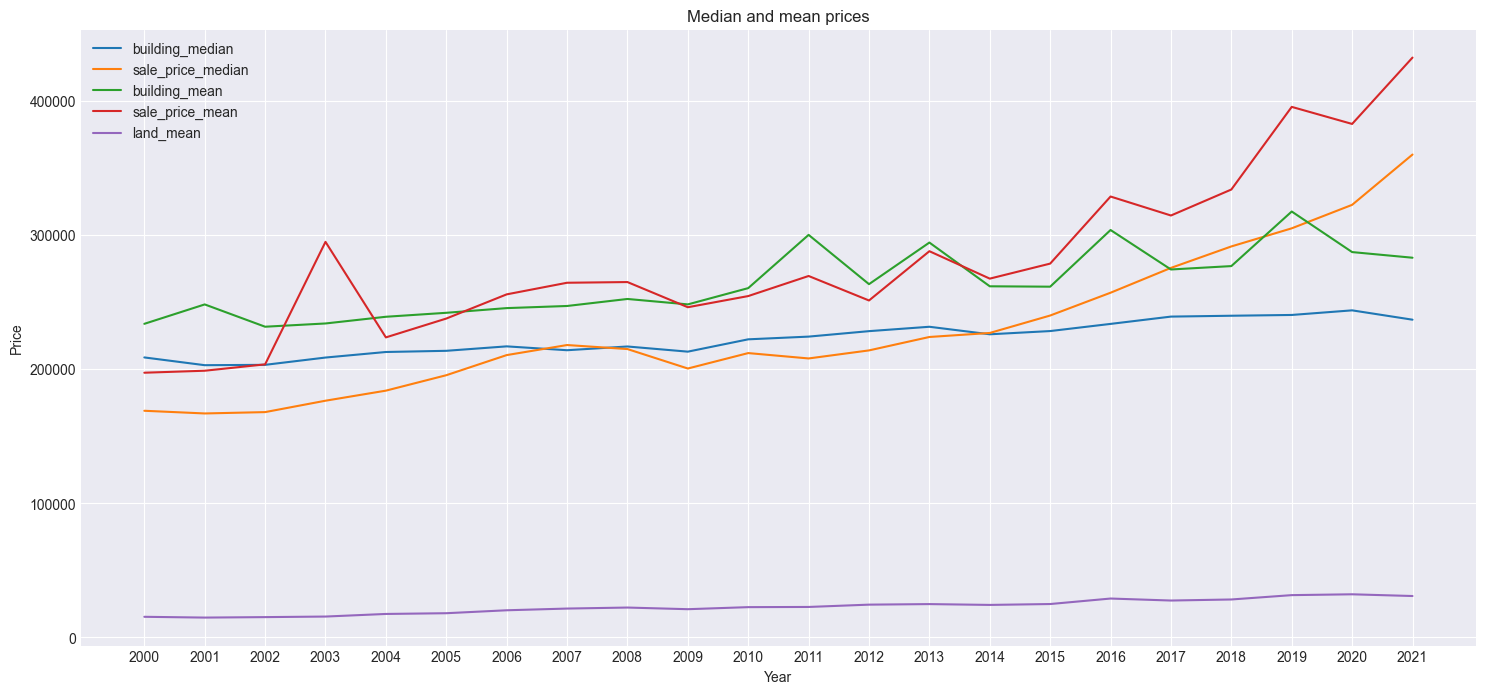

In [25]:
create_line_chart_all(price_summary, col_name_list)

# Frequencies plots

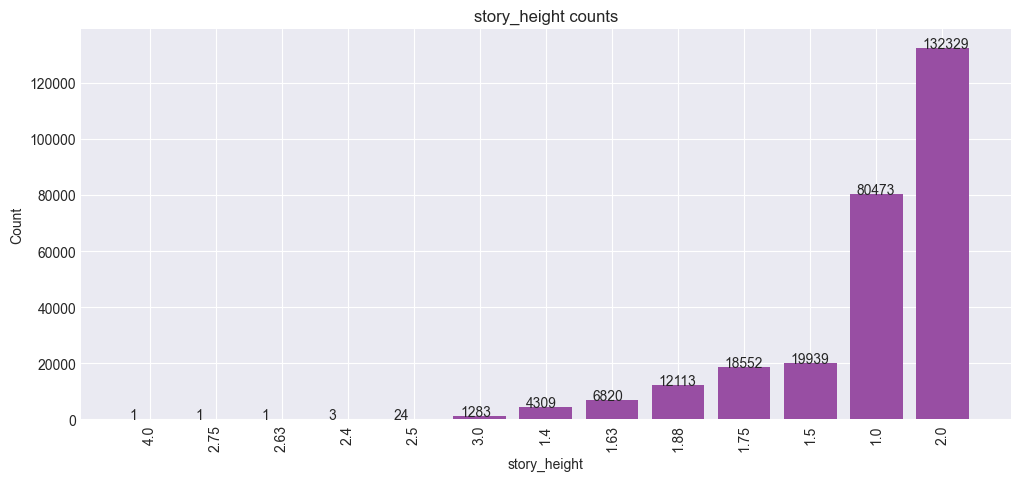

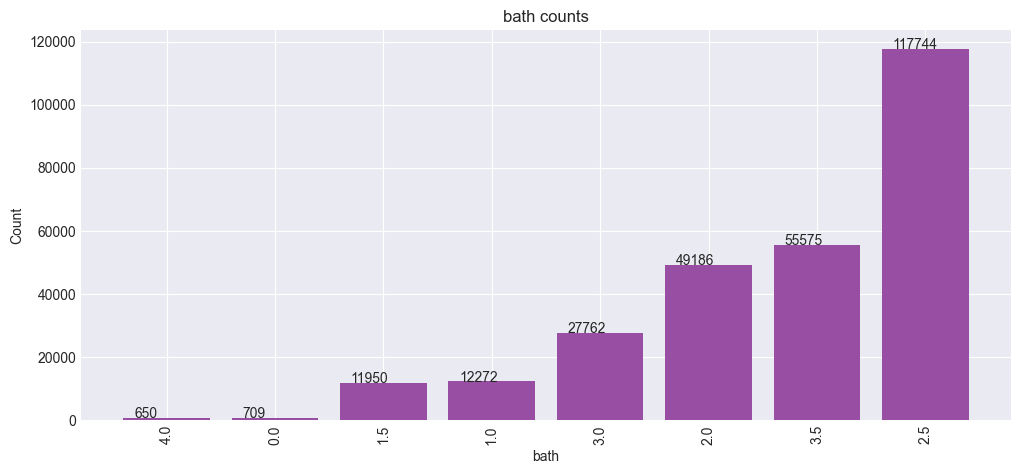

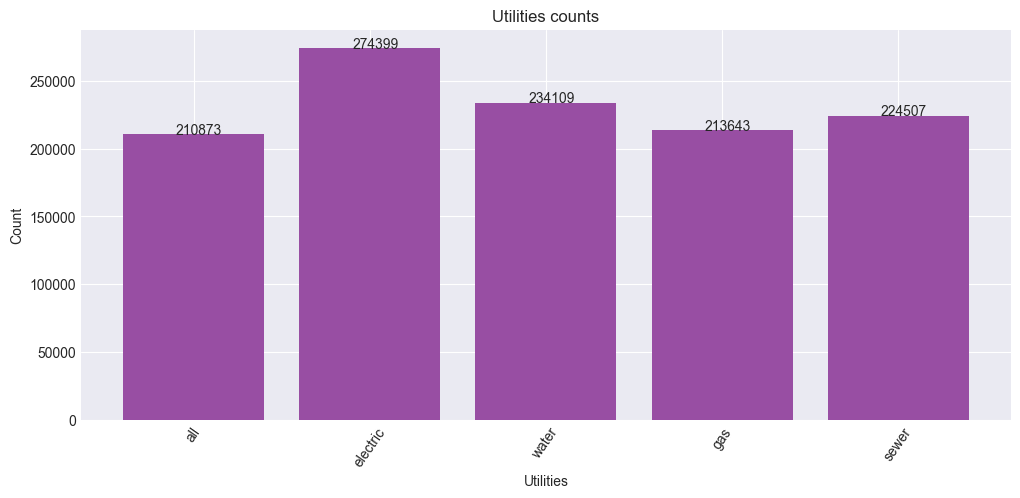

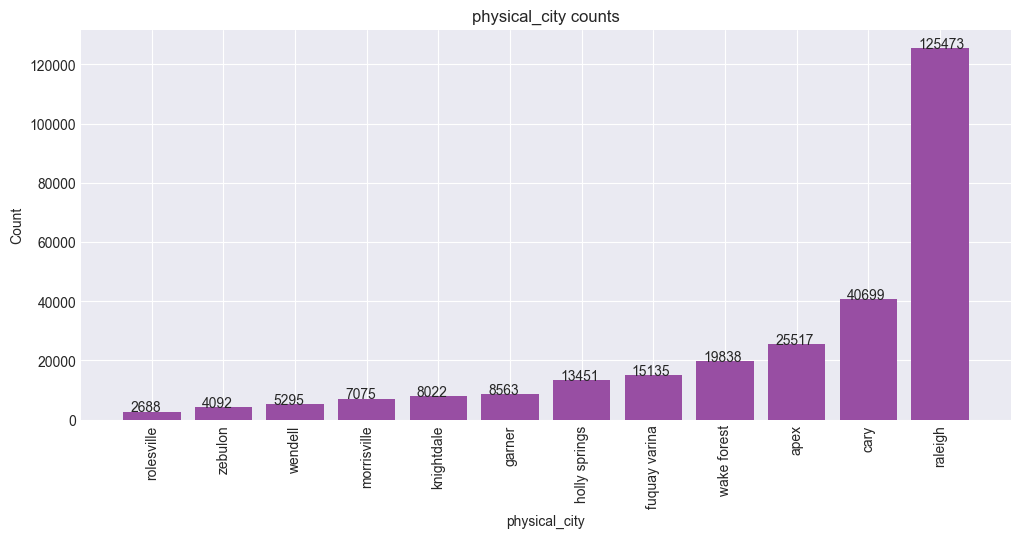

In [26]:
frequency_list = ['story_height', 'bath', 'utility', 'physical_city']
frequency_plots(df, frequency_list)

Based on the above chart, Raleigh city has the most counts of houses.

## Histogram charts

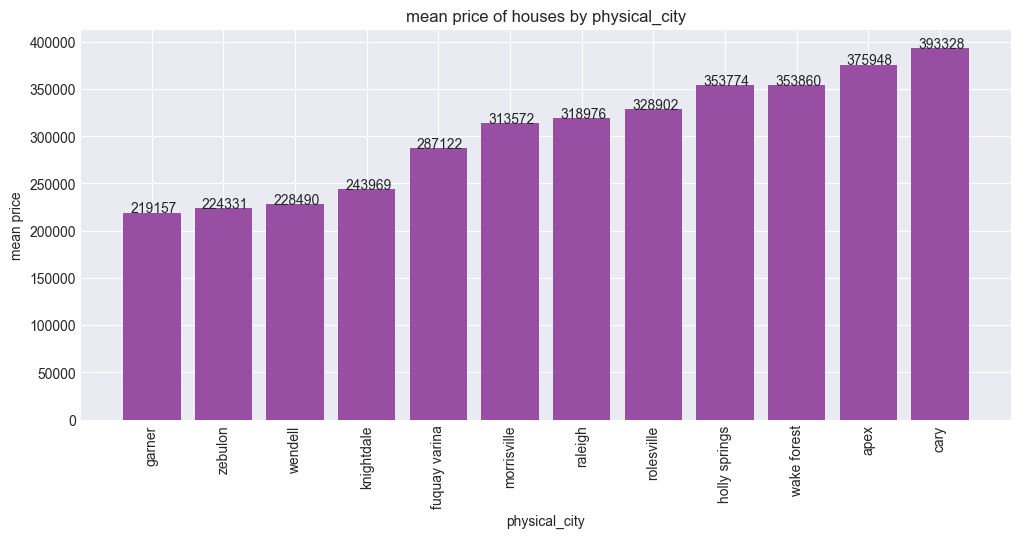

In [27]:
house_price_hist(df, 'total_sale_price', 'physical_city', 'mean')

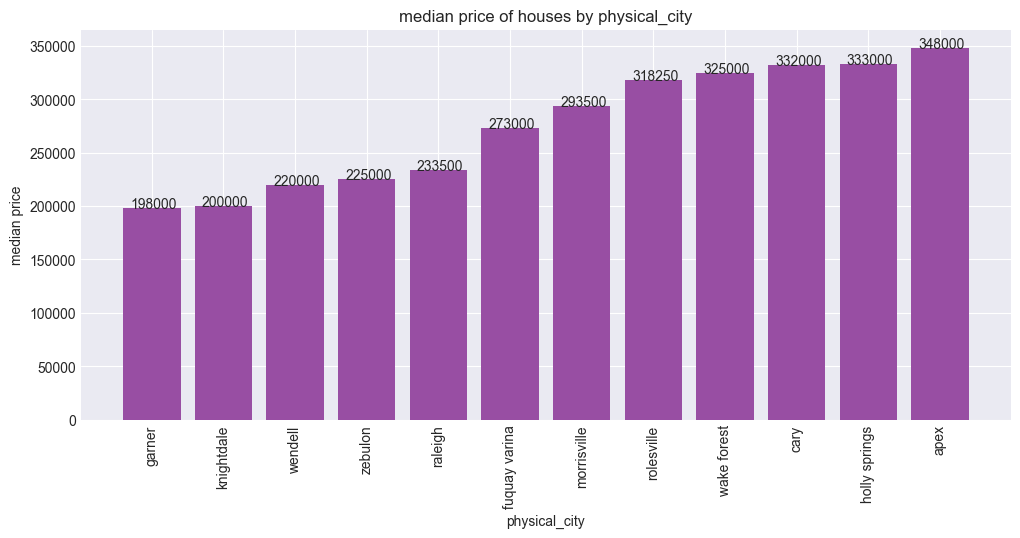

In [28]:
house_price_hist(df, 'total_sale_price', 'physical_city', 'median')

Rolesville, Holly Springs, Wake Forest, Apex and Cary are top 5 of house prices

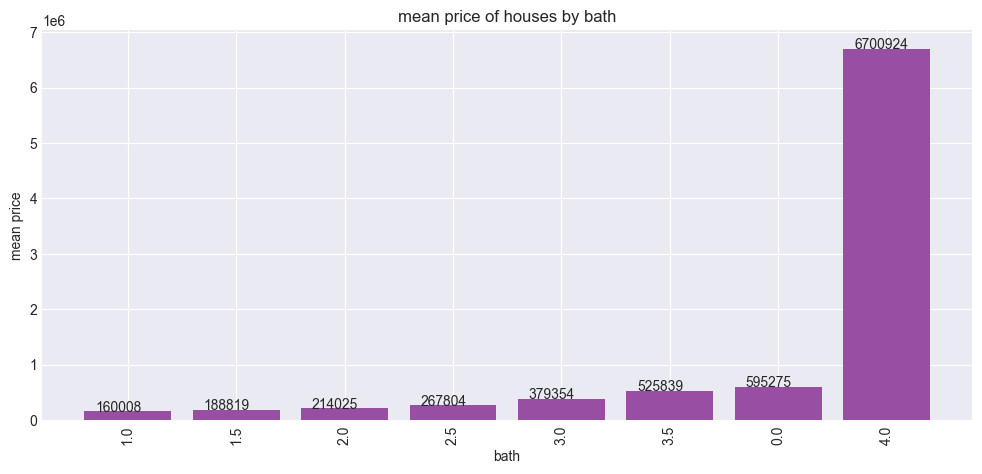

In [29]:
house_price_hist(df, 'total_sale_price', 'bath', 'mean')

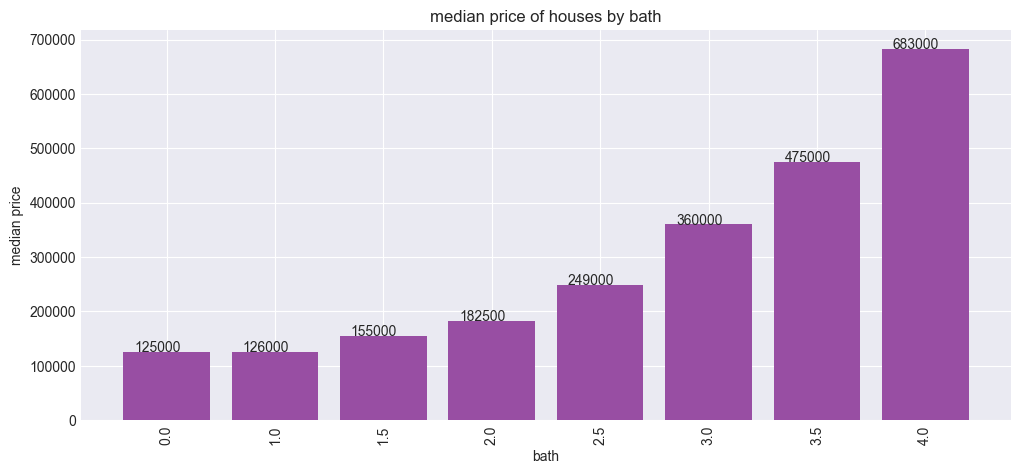

In [30]:
house_price_hist(df, 'total_sale_price', 'bath', 'median')

Based on the histogram charts of mean&median house prices by bathroom number, the more bathroom, the higher house price.

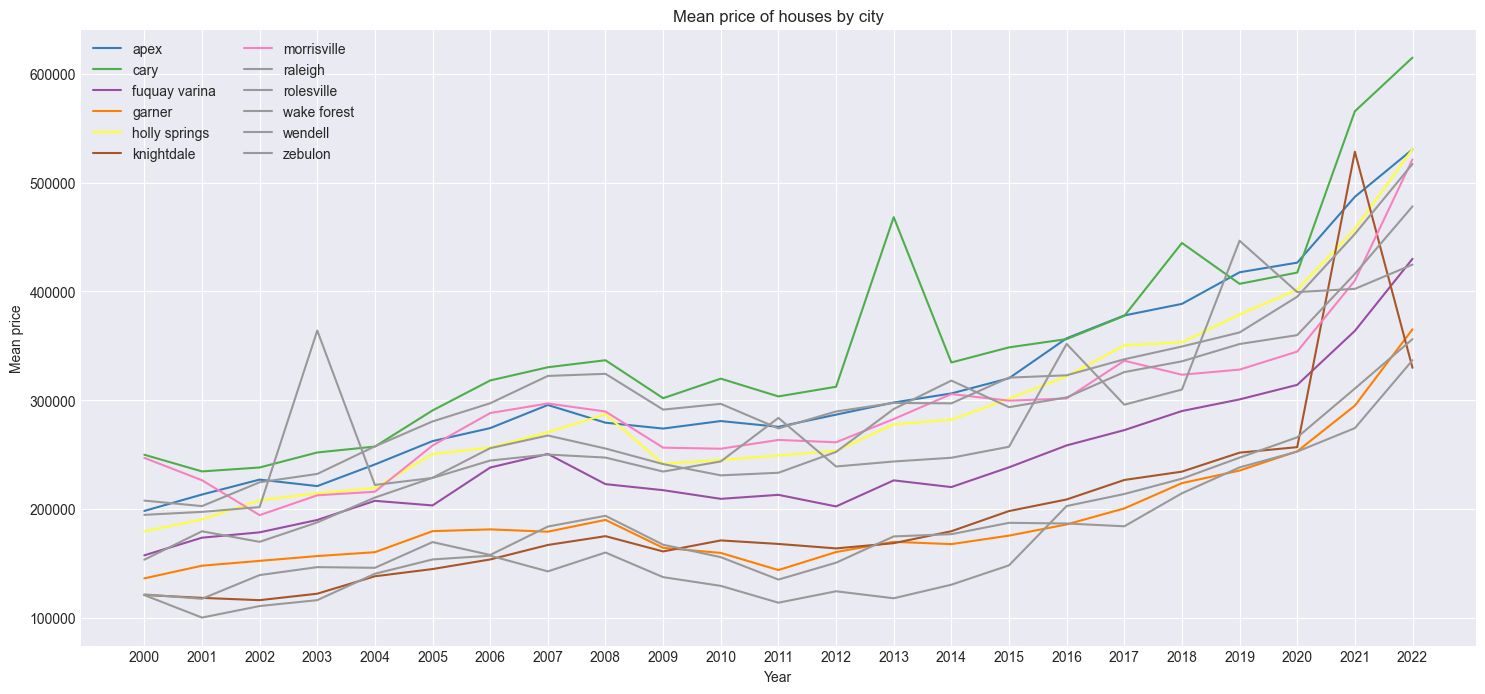

In [31]:
all_mean_price_line(df, plt_style='seaborn-darkgrid', get_cmap='Set1')

The line chart is too complex to read. Let's have a look at mean and median house prices by city

findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


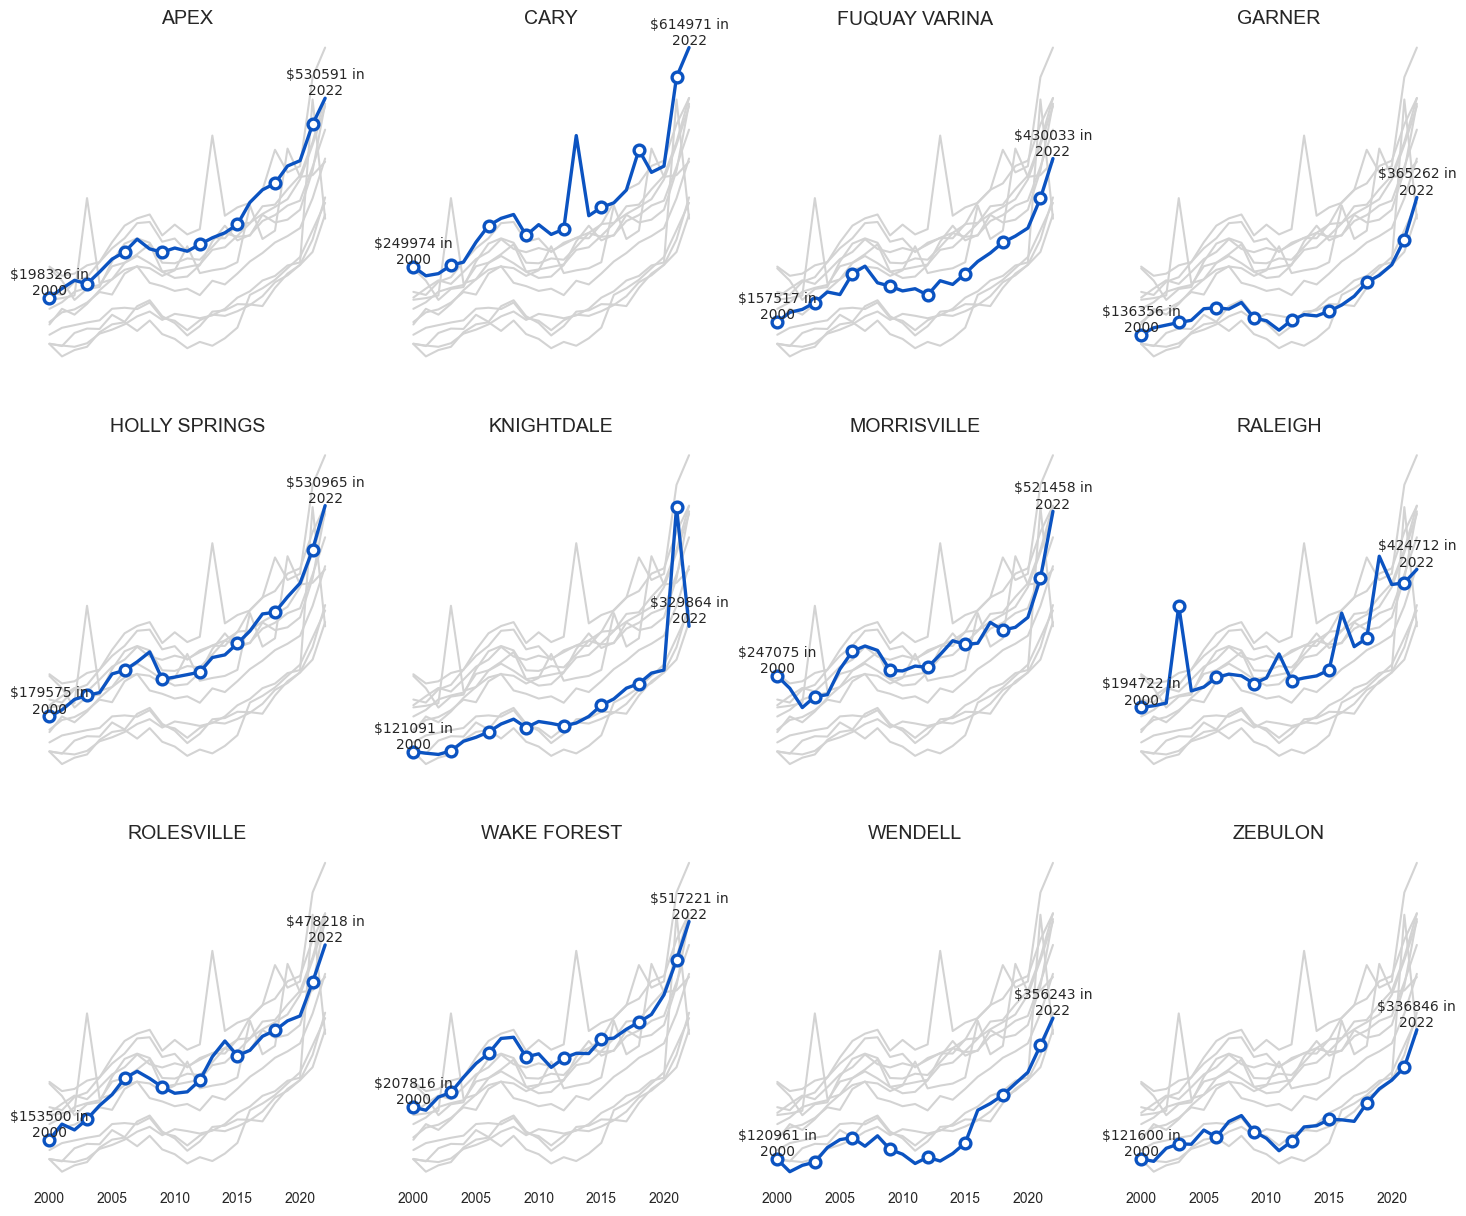

In [32]:
COUNTRIES = get_countries(df)
new_df = get_new_df(df)
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(18, 15))
for idx, (ax, country) in enumerate(zip(axes.ravel(), COUNTRIES)):
    plot_country(df, country, new_df, ax, 'mean')

In [33]:
def final_sep_line_chart():
    fig.subplots_adjust(wspace=0.1, left=0.025, right=0.975, bottom=0.11, top=0.82)

    # Adds title.
    fig.text(
        x=0.5, 
        y=0.92,
        s="MEAN HOUSE PRICE BY CITY IN WAKE COUNTY, NC",
        ha="center",
        va="center",
        ma="center",
        fontsize=22,
        fontweight="bold"
    )

    # Adds caption
    fig.text(
        x=0.975,
        y=0.05,
        s="Data from Wake County, NC Open Data Portal.",
        ha="right",
        ma="right",
        fontsize=10
    )

    fig.text(
        x=0.975,
        y=0.03,
        s="Milestone II",
        ha="right",
        ma="right",
        fontsize=10,
        fontweight="bold", 
    )

    # Sets background color
    fig.set_facecolor("#f9fbfc")

    return fig

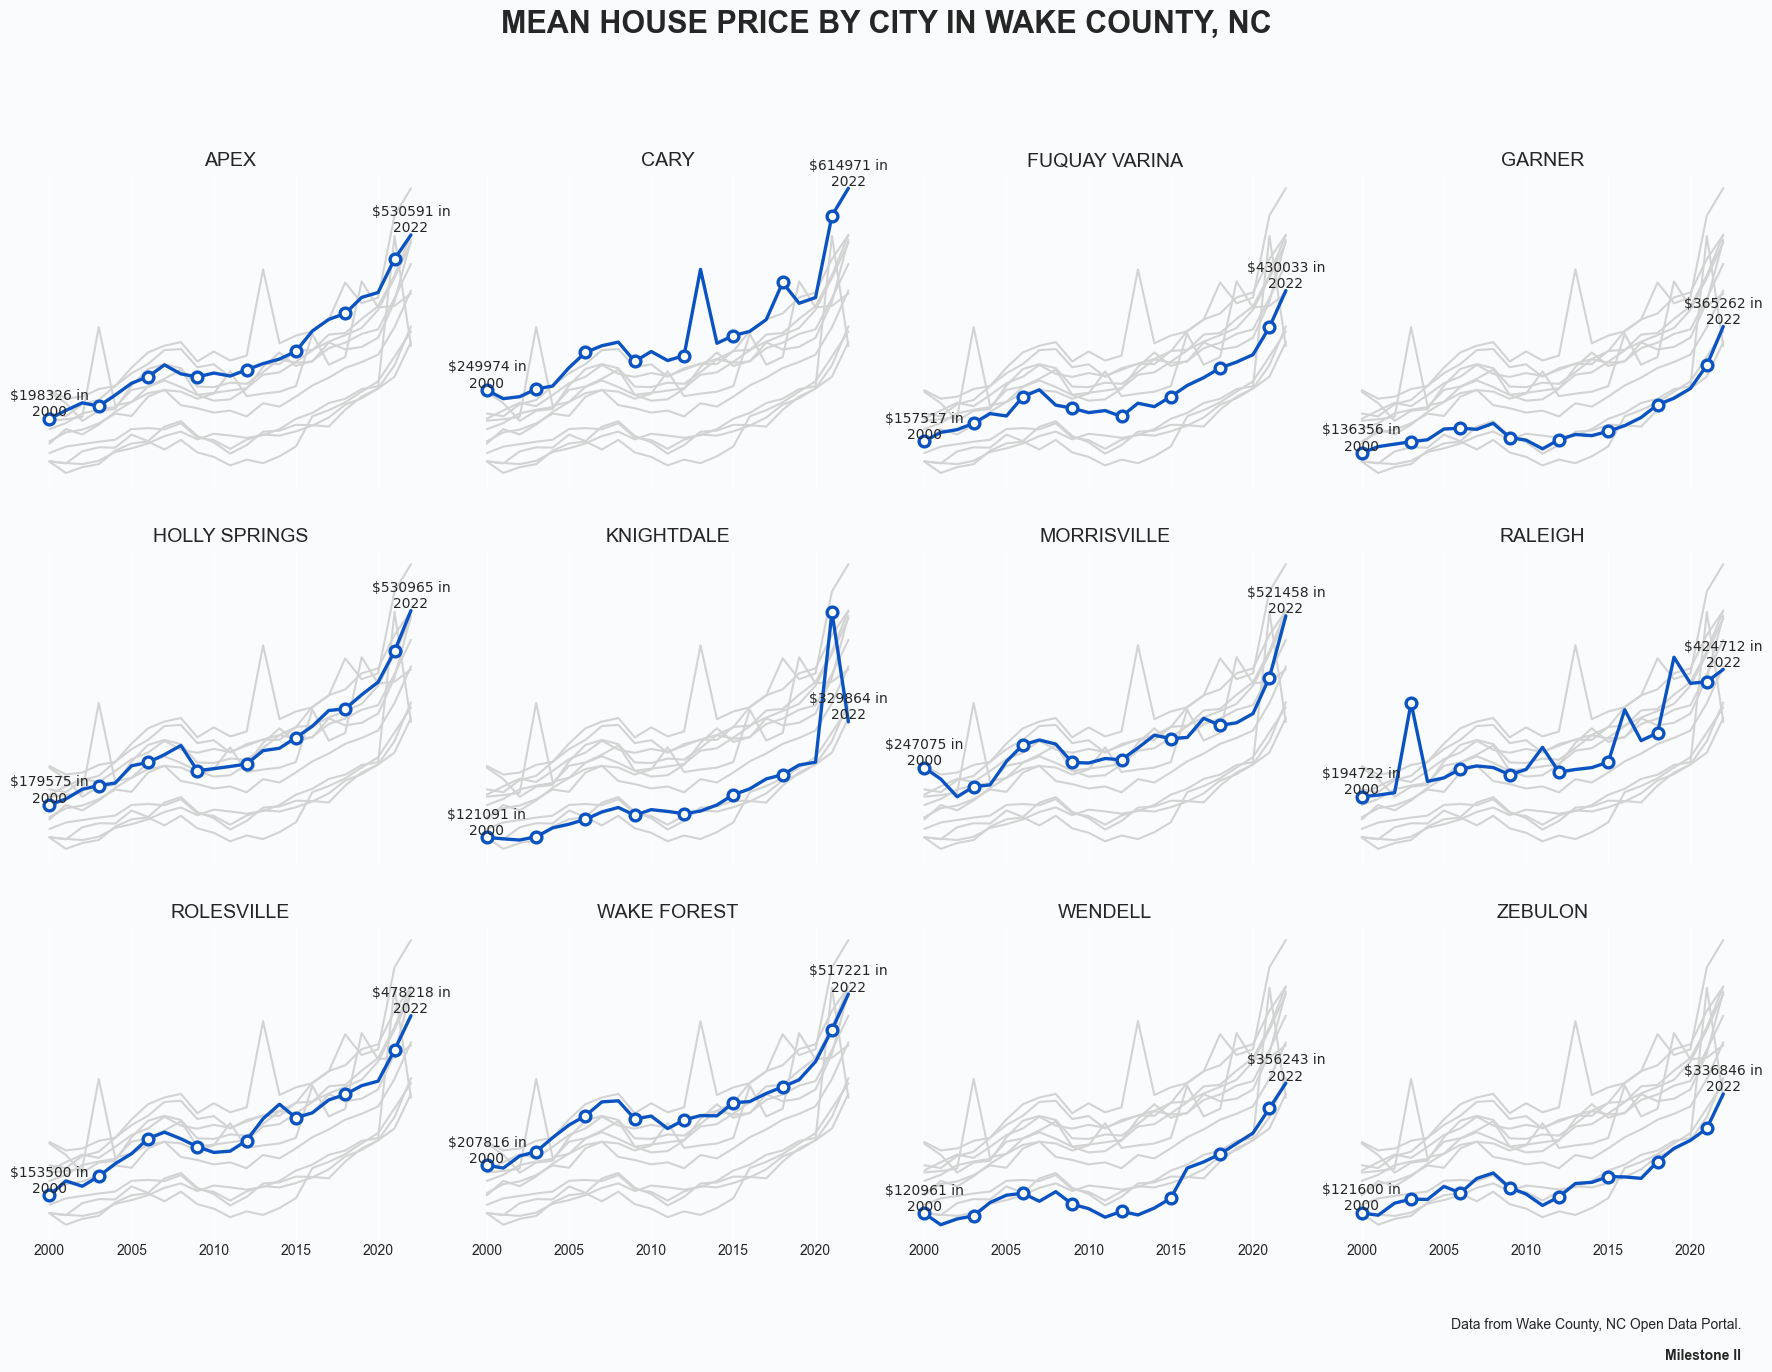

In [34]:
final_sep_line_chart()

Based on the above charts, Cary, Apex, Wake Forest, Hollyspring and Molesville are top 5 house sale prices. Garner has the lowest house sale price.
At the city of Knightdale and Cary, the house mean price increased dramatically in 2021.

Let's have a look at median house price by city

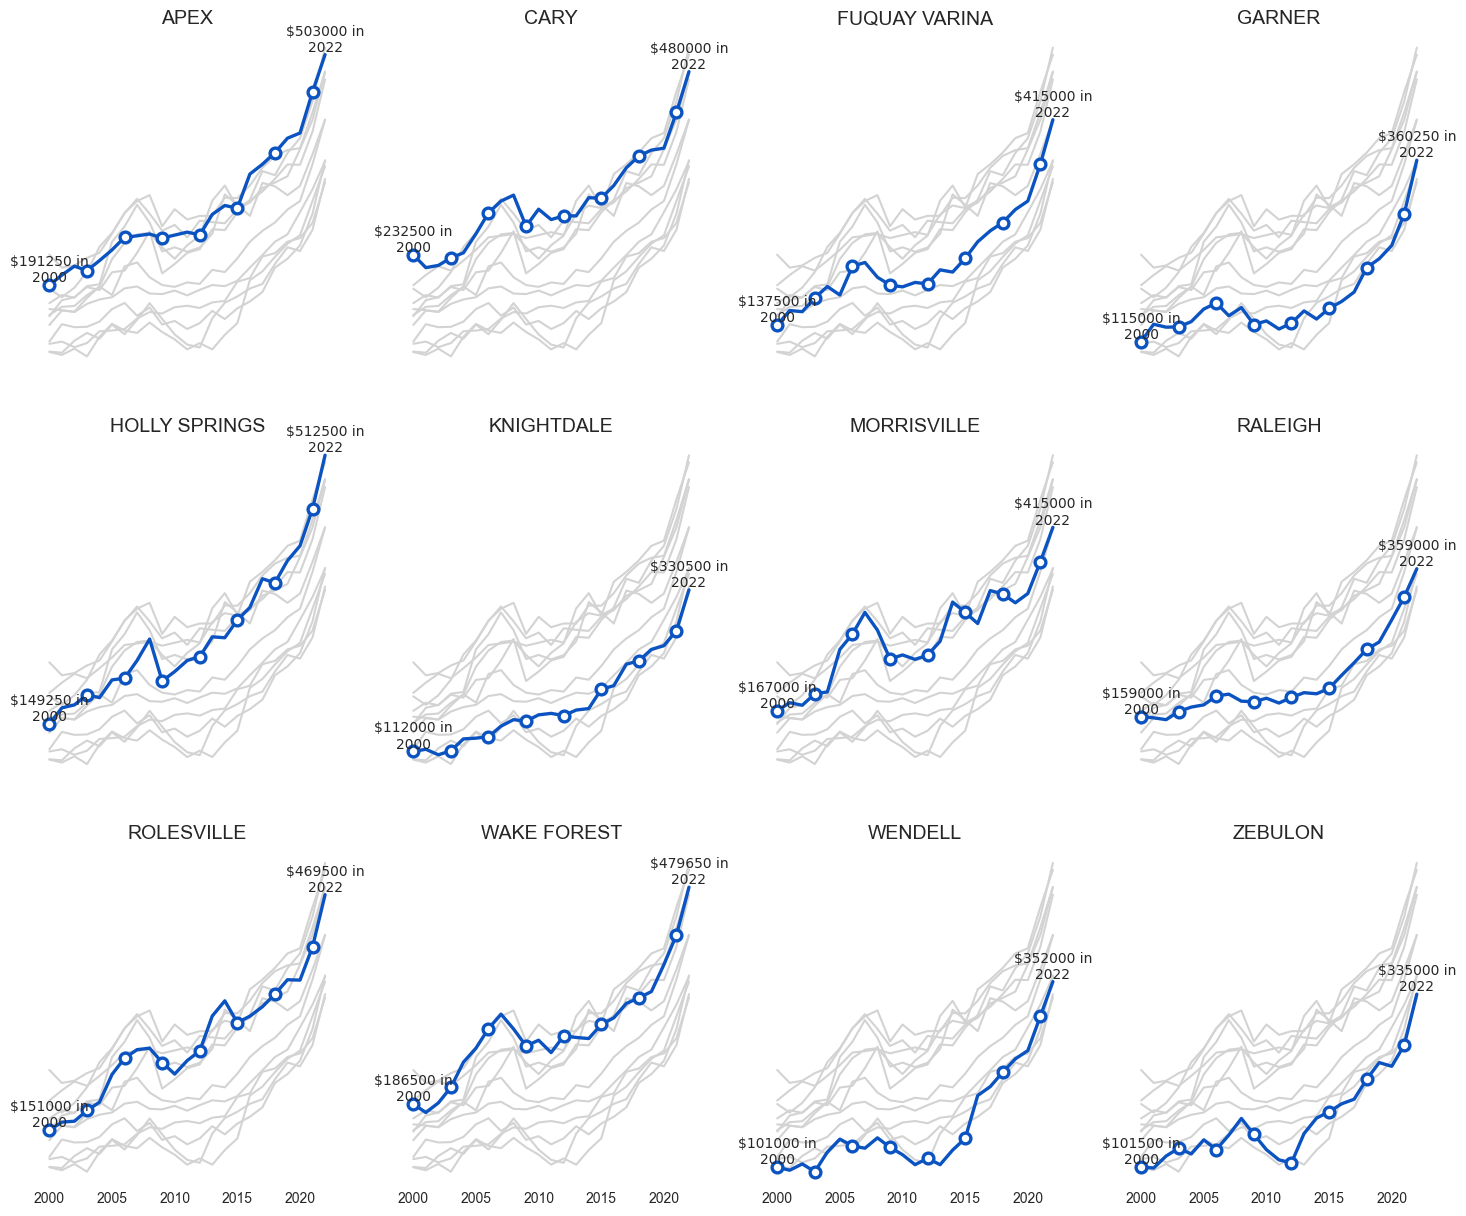

In [35]:
COUNTRIES = get_countries(df)
new_df = get_new_df(df)
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(18, 15))
for idx, (ax, country) in enumerate(zip(axes.ravel(), COUNTRIES)):
    plot_country(df, country, new_df, ax, 'median')

In [36]:
def final_sep_line_chart():
    fig.subplots_adjust(wspace=0.1, left=0.025, right=0.975, bottom=0.11, top=0.82)

    # Adds title.
    fig.text(
        x=0.5, 
        y=0.92,
        s="MEDIAN HOUSE PRICE BY CITY IN WAKE COUNTY, NC",
        ha="center",
        va="center",
        ma="center",
        fontsize=22,
        fontweight="bold"
    )

    # Adds caption
    fig.text(
        x=0.975,
        y=0.05,
        s="Data from Wake County, NC Open Data Portal.",
        ha="right",
        ma="right",
        fontsize=10
    )

    fig.text(
        x=0.975,
        y=0.03,
        s="Milestone II",
        ha="right",
        ma="right",
        fontsize=10,
        fontweight="bold", 
    )

    # Sets background color
    fig.set_facecolor("#f9fbfc")

    return fig

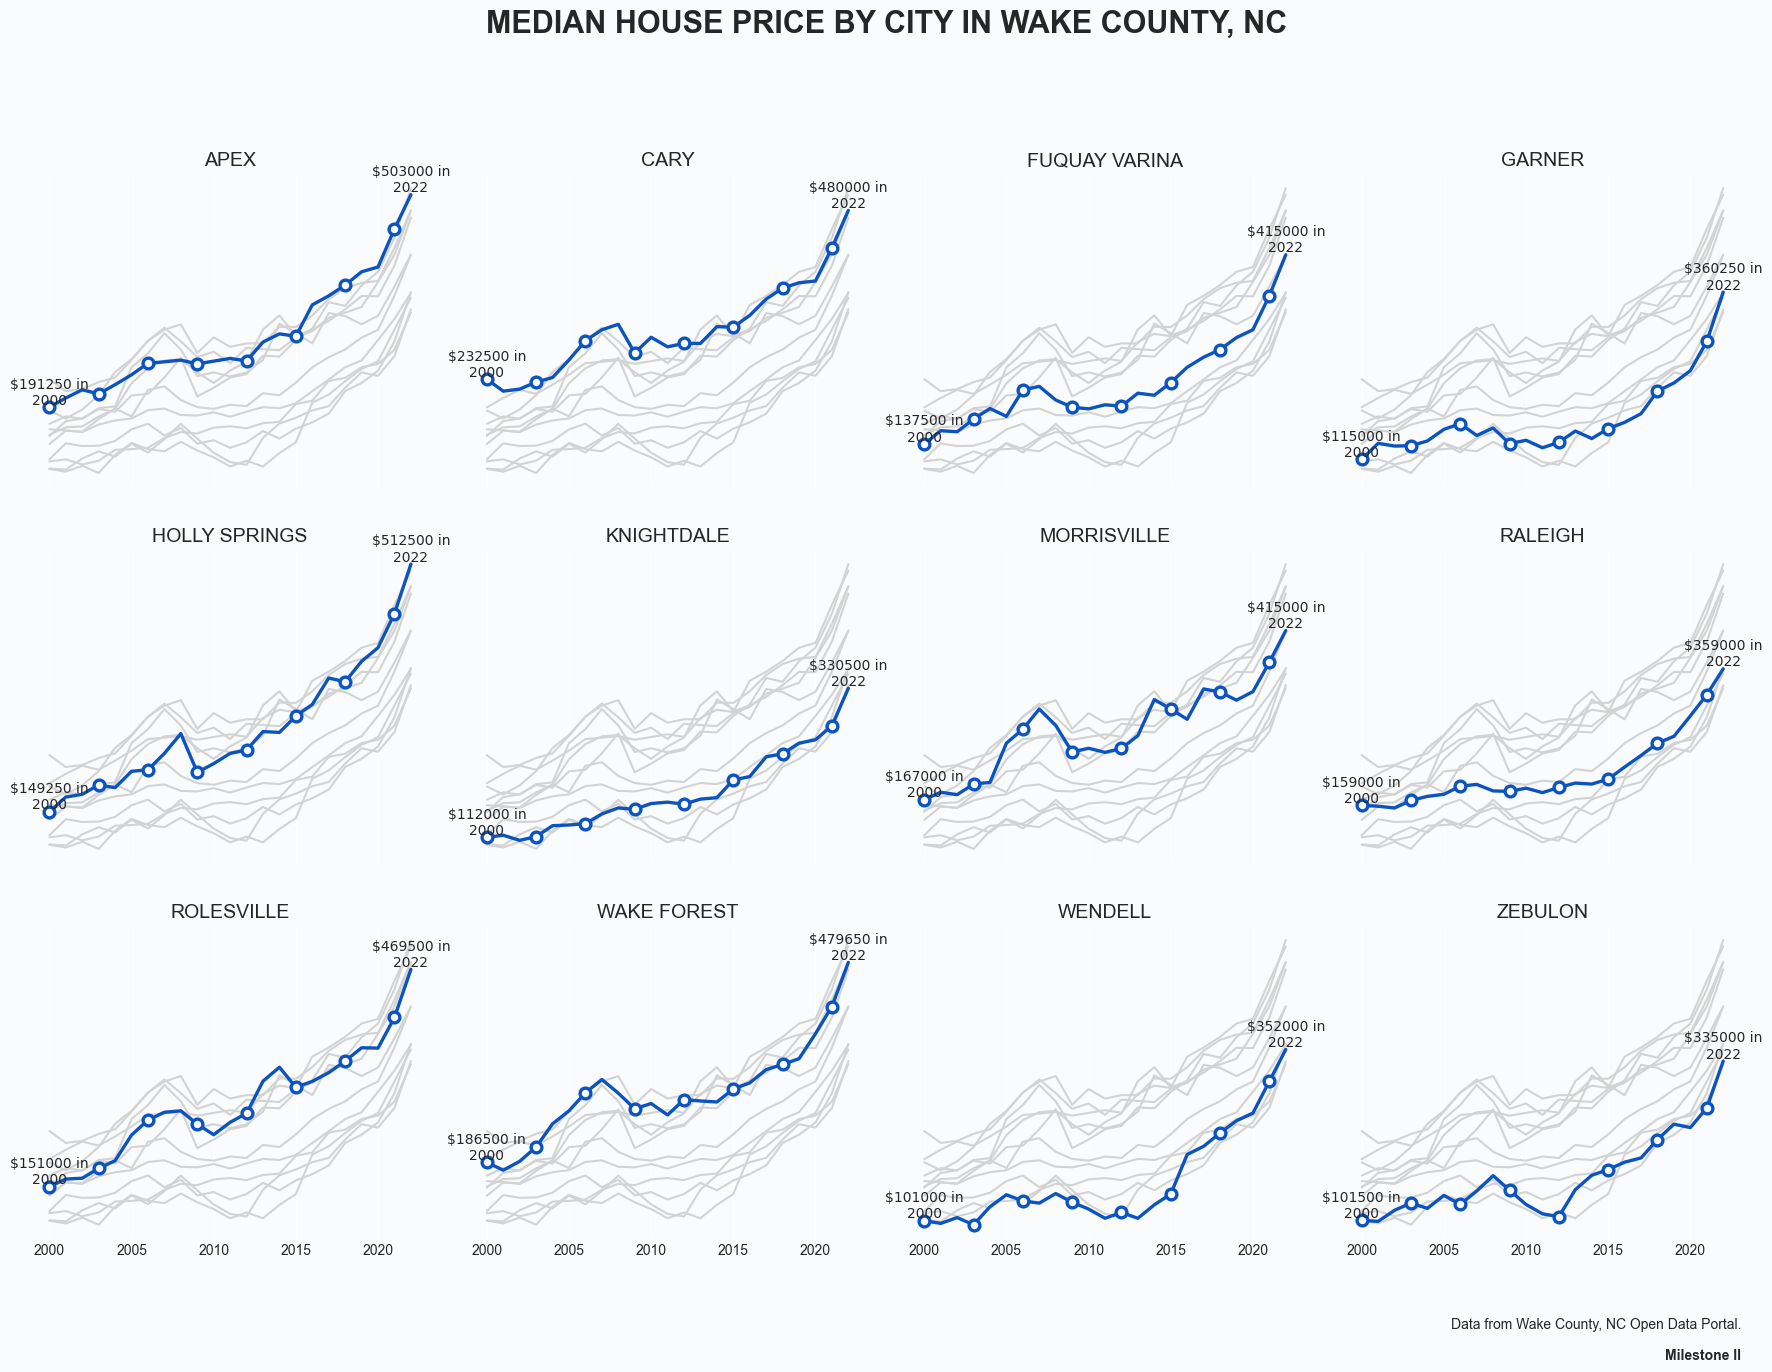

In [37]:
final_sep_line_chart()

Based on the mean and median plots, we can see that there are dramatically increasing mean house prices in some cities, such as Cary, Knightdale, Morrisville, Raleigh, and Wake Forest. It is caused by outliers in the data. We do not want to conclude based on these outliers, so we use the median value to interpret the chart.

The primary trend of house prices in Wake County, NC, is increasing from 2000 to 2022. Apex, Cary, Holly Springs, and Wake Forest have more expensive house prices than other cities. Moreover, at Apex, Cary, Morrisville, and Wake Forest, the increasing rates of median house prices are more than 40%.

## Choropleth Map

In [42]:
grouped_zip_df = get_grouped_zip_df(df)
get_zip_map(grouped_zip_df, wake_lat_lon, zoom_start, fill_color_1, fill_color_2)

## Summary of data

In [40]:
df[['land_sale_price', 'total_sale_price', 'assessed_building_value', 'story_height', 'heated_area', 'bath']].describe(include='all')

land_sale_price  total_sale_price  assessed_building_value  \
count     2.758480e+05      2.758480e+05             2.758480e+05   
mean      2.623263e+04      3.292116e+05             2.739546e+05   
std       5.906676e+04      8.111484e+05             6.251899e+05   
min       0.000000e+00      5.000000e+00             0.000000e+00   
25%       0.000000e+00      1.750000e+05             1.635590e+05   
50%       0.000000e+00      2.710000e+05             2.299980e+05   
75%       3.950000e+04      3.950000e+05             3.223472e+05   
max       5.538500e+06      9.100000e+07             5.673290e+07   

        story_height    heated_area           bath  
count  275848.000000  275848.000000  275848.000000  
mean        1.636237    2314.921352       2.549692  
std         0.442735    1045.571066       0.658426  
min         1.000000     220.000000       0.000000  
25%         1.000000    1562.000000       2.000000  
50%         1.880000    2135.000000       2.500000  
75%         2.000000    2847.000000       3.000000  
max         4.000000   38730.000000       4.000000

## Test the normality of data
There are several methods testing the normality of data. We will use distribution plots and QQ plot for the project. We do not 
use Shapiro-Wilk test because the sample size of the dataset is much greater than 5,000 because p-value calculation is not 
trusted much for sample sizes above about 5,000.
### Distribution plots
Simply generate distribution plots for mean/median price of house sale/building price to see if the plot is normal distribution.

1. Price values histograms
1. House median sale price
   
   Median house sale price is right-tailed which is non-normal distributed.
1. House mean sale price
   
   Mean house sale price is right-tailed which is non-normal distributed.
4. House median building price
   
   Median building sale price is closed to normal distributed, but not typically.
5. House mean building price
   
   Mean house sale price is right-tailed which is non-normal distributed.

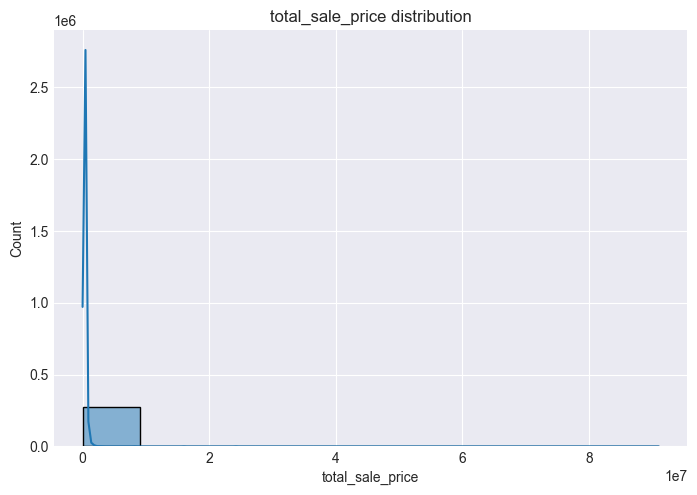

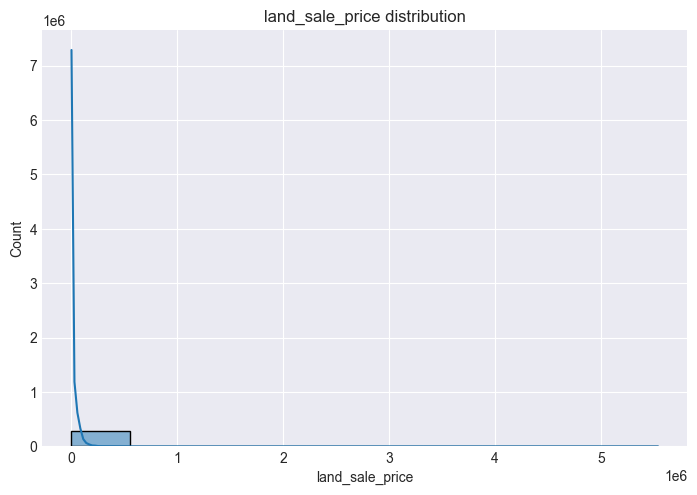

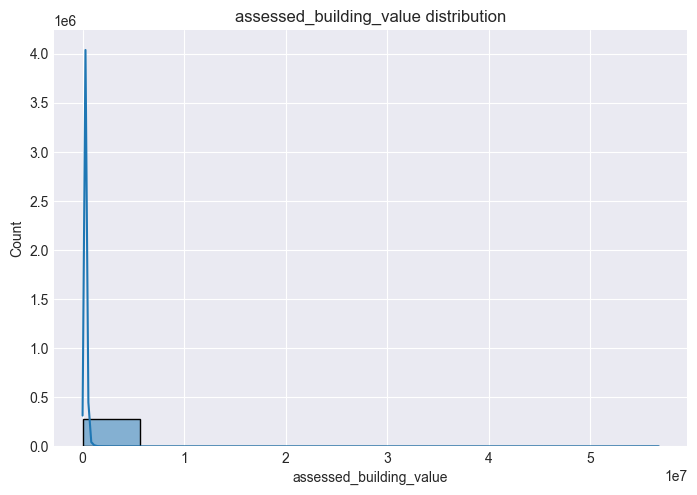

In [43]:
variable_list = ['total_sale_price', 'land_sale_price', 'assessed_building_value']
dis_plots(df, variable_list)

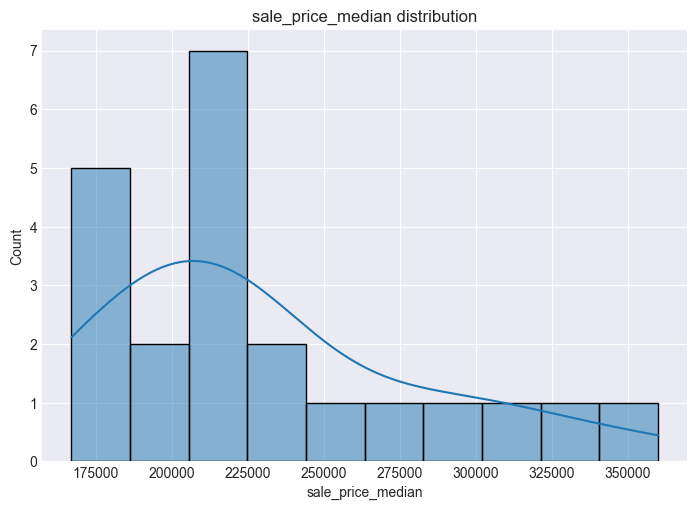

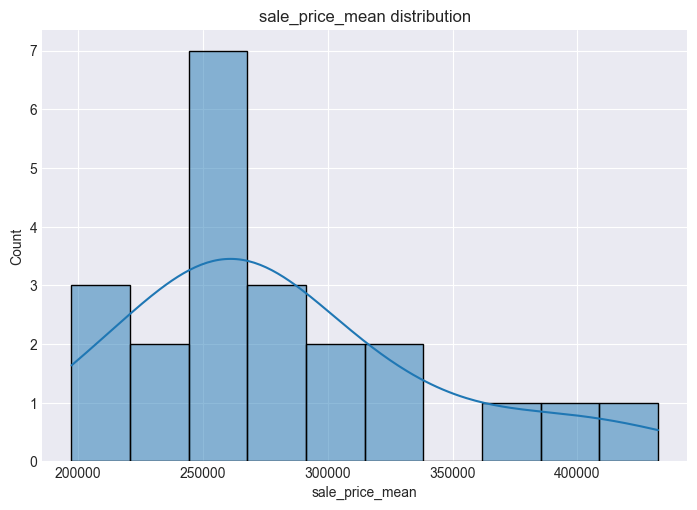

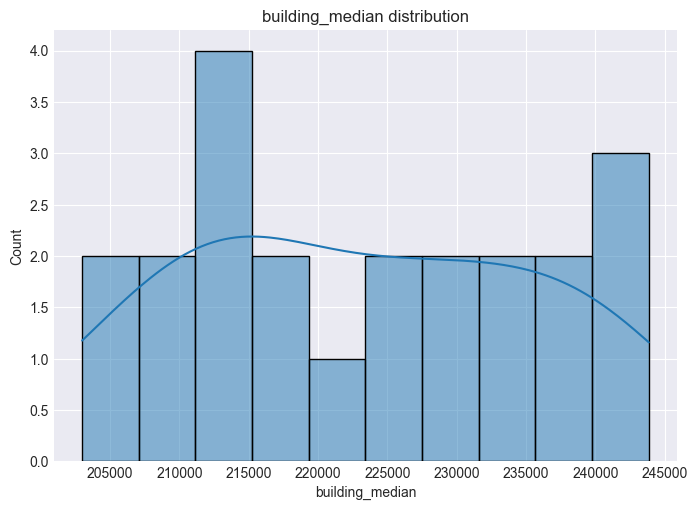

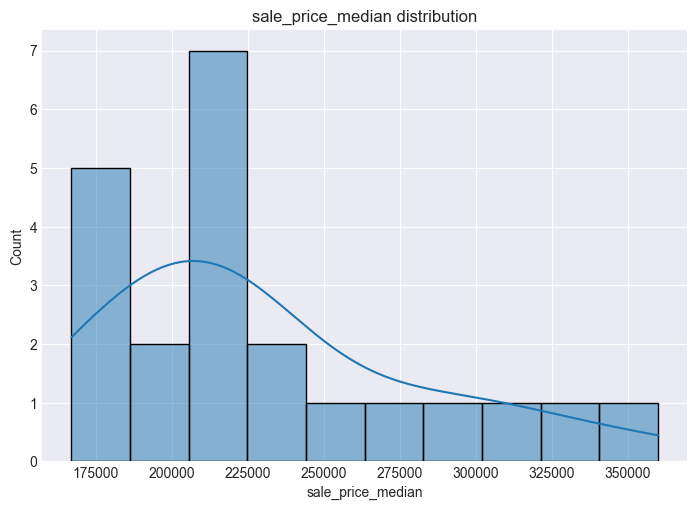

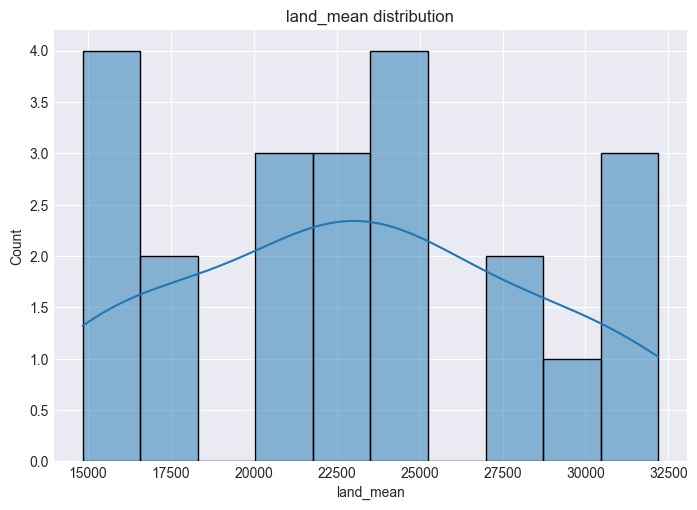

In [44]:
variable_list = ['sale_price_median', 'sale_price_mean', 'building_median', 'sale_price_median', 'land_mean']
dis_plots(price_summary, variable_list)

### QQ plot
Quantile-Quantile plot is another popular method for checking the distribution.
1. House median sale price

<Figure size 640x480 with 0 Axes>

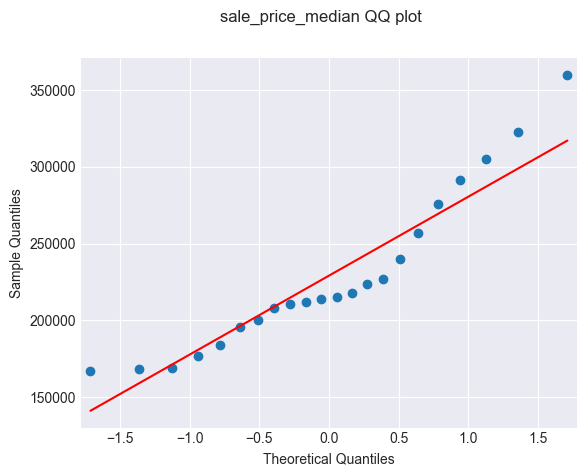

<Figure size 640x480 with 0 Axes>

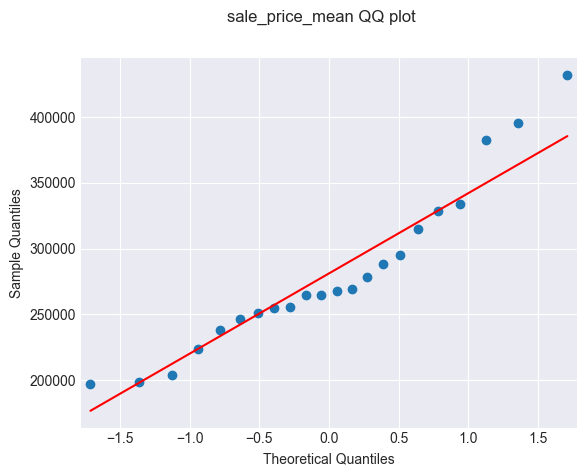

<Figure size 640x480 with 0 Axes>

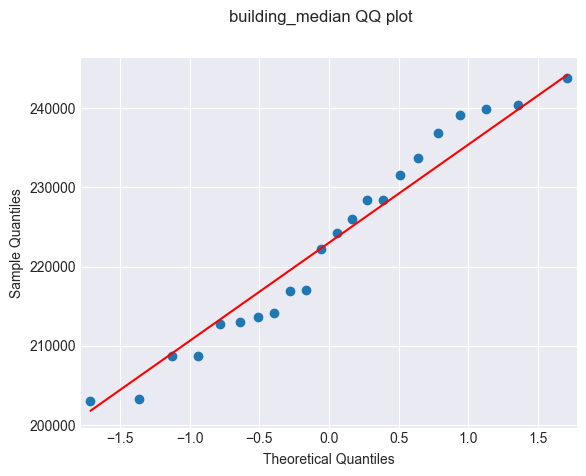

<Figure size 640x480 with 0 Axes>

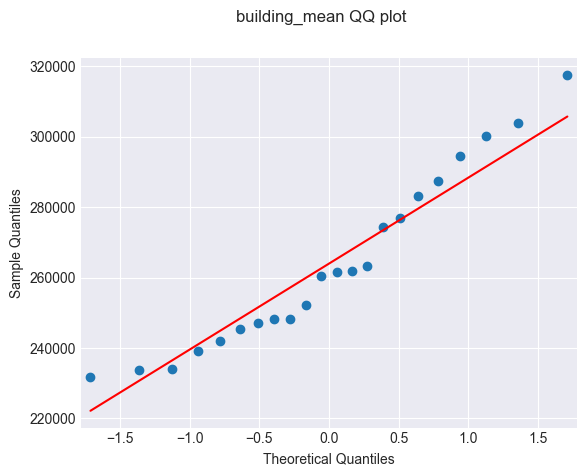

In [45]:
variable_list = ['sale_price_median', 'sale_price_mean', 'building_median', 'building_mean']
qq_plots(price_summary, variable_list)

### D'Agostino's K^2 Test
The D'Agostino's K^2 test calculates summary statistics from the data.
1. House median sale price

In [46]:
dagostino_k2_test(price_summary, 'sale_price_median')

sale_price_median Statistics=4.681, p=0.096
Sample looks Gaussian (fail to reject H0)


2.  House mean sale price

In [47]:
dagostino_k2_test(price_summary, 'sale_price_median')

sale_price_median Statistics=4.681, p=0.096
Sample looks Gaussian (fail to reject H0)


3. Building median sale price

In [48]:
dagostino_k2_test(price_summary, 'building_median')

building_median Statistics=3.602, p=0.165
Sample looks Gaussian (fail to reject H0)


4. Building mean sale price

In [49]:
dagostino_k2_test(price_summary, 'building_mean')

building_mean Statistics=2.054, p=0.358
Sample looks Gaussian (fail to reject H0)


5. Land mean sale price

In [50]:
dagostino_k2_test(price_summary, 'land_mean')

land_mean Statistics=1.664, p=0.435
Sample looks Gaussian (fail to reject H0)


### Hard fail of normality tests
A failure of one normality test means that the data is not normal even though the last test, 
D'Agostino's K^2 Test, shows all data is normally distributed.

The next step is to normalize house sale and building price data.

### Fix the normality issue
There are two ways to transform a continuous (numeric) variable to make the transformed variable looks 
normally distributed.
1. Box-Cox power transformation

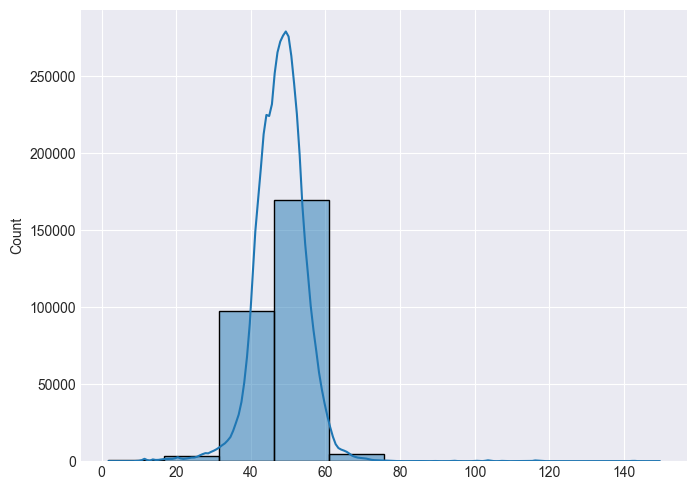

In [51]:
box_cox_displot(df, 'total_sale_price')

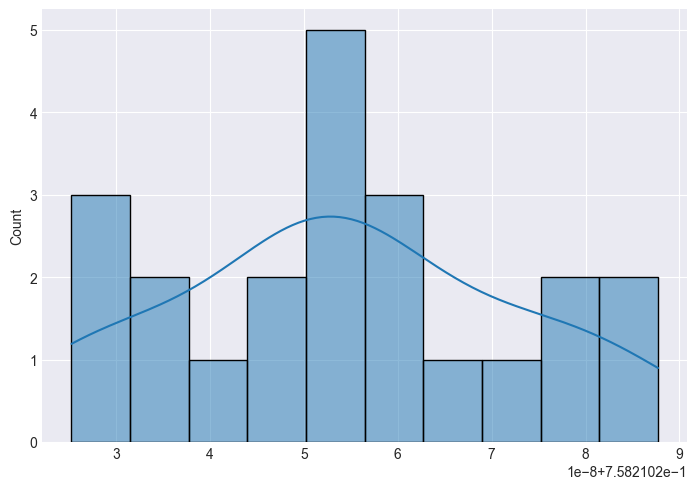

In [52]:
box_cox_displot(price_summary, 'sale_price_median')

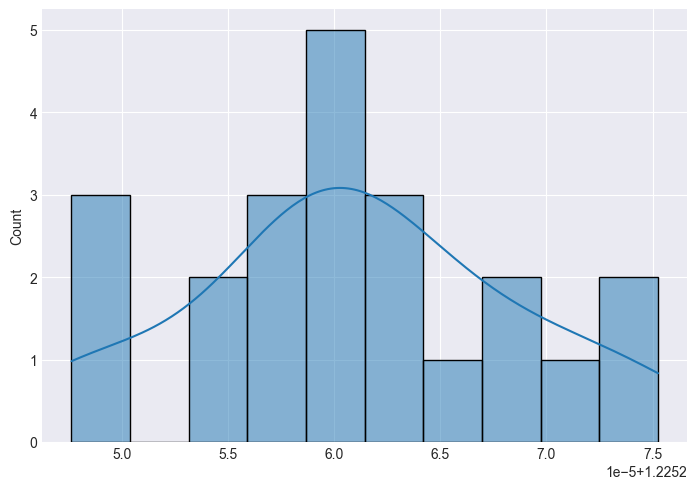

In [53]:
box_cox_displot(price_summary, 'sale_price_mean')

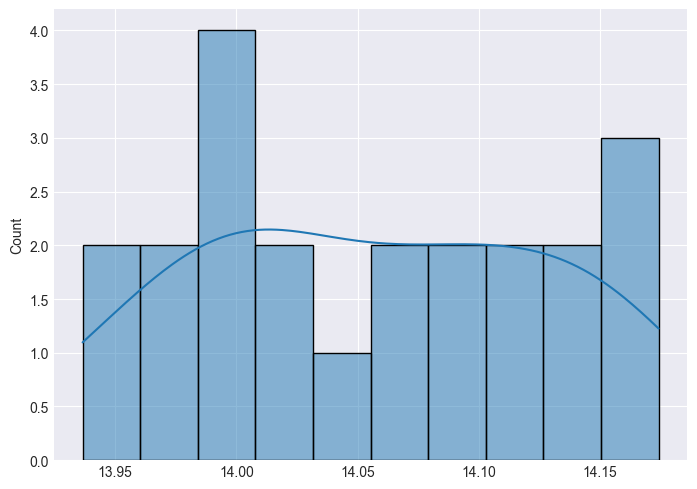

In [54]:
box_cox_displot(price_summary, 'building_median')

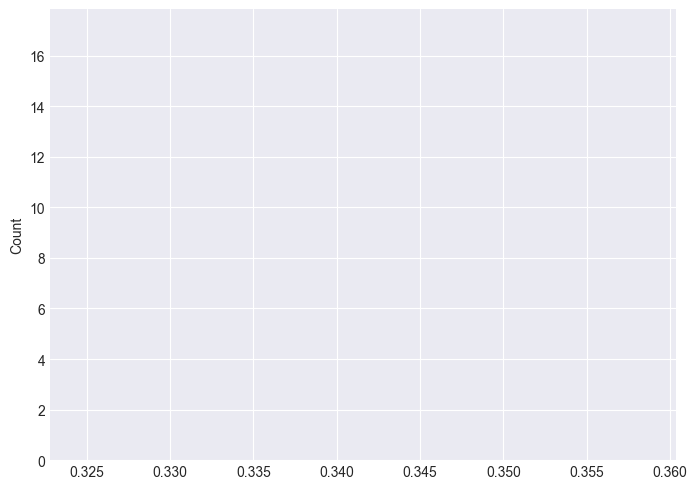

In [55]:
box_cox_displot(price_summary, 'building_mean')

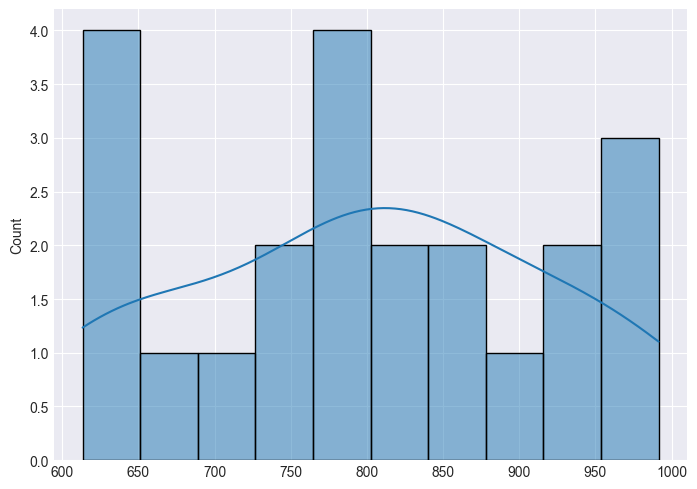

In [56]:
box_cox_displot(price_summary, 'land_mean')

2. Yeo-Johnson power transformation

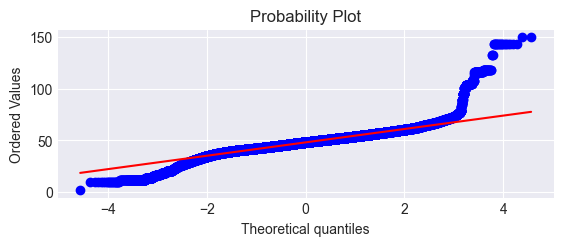

In [57]:
yeo_johnson_probplot(df, 'total_sale_price')

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_morestats.py:1558: RuntimeWarning:

divide by zero encountered in log

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_optimize.py:2323: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_optimize.py:2324: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\optimize\_optimize.py:2322: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.

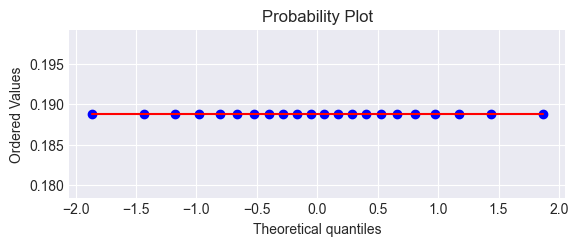

In [58]:
yeo_johnson_probplot(price_summary, 'sale_price_median')

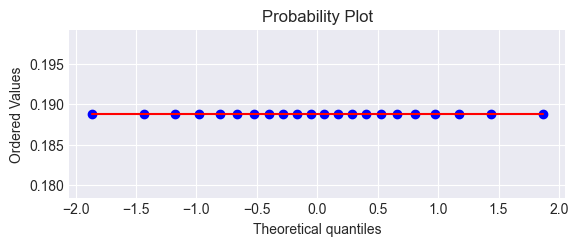

In [59]:
yeo_johnson_probplot(price_summary, 'sale_price_median')

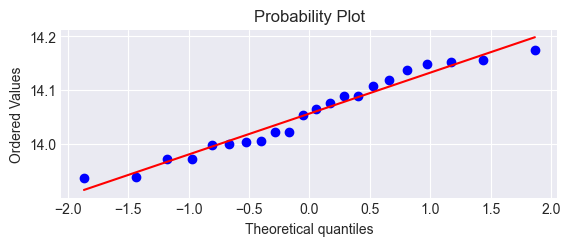

In [60]:
yeo_johnson_probplot(price_summary, 'building_median')

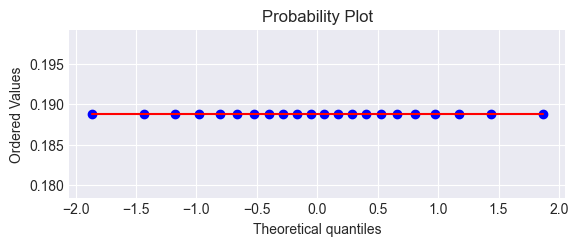

In [61]:
yeo_johnson_probplot(price_summary, 'building_mean')

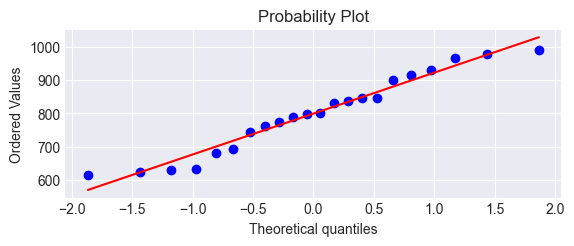

In [62]:
yeo_johnson_probplot(price_summary, 'land_mean')

We use Box-Cox transformation to normalize mean and median values

In [63]:
price_summary['boxcox_sale_median'] = stats.boxcox(price_summary.sale_price_median)[0]
price_summary['boxcox_sale_mean'] = stats.boxcox(price_summary.sale_price_mean)[0]
price_summary['boxcox_building_median'] = stats.boxcox(price_summary.building_median)[0]
price_summary['boxcox_building_mean'] = stats.boxcox(price_summary.building_mean)[0]
price_summary['boxcox_land_mean'] = stats.boxcox(price_summary.land_mean)[0]
price_summary.head()

year  sale_price_mean  sale_price_median  building_mean  building_median  \
0  2000    197361.536359           169000.0  233807.153362         208762.0   
1  2001    198846.262019           167000.0  248273.113702         202978.5   
2  2002    203592.898034           168000.0  231651.804277         203235.0   
3  2003    294916.215535           176500.0  234080.585128         208674.0   
4  2004    223695.456840           184000.0  239072.540554         212814.5   

      land_mean  land_median  interest_rate  mort_rate  unemploy_rate  \
0  15419.627939          0.0       6.813424       8.21            2.4   
1  14835.183654          0.0       4.565848       7.03            3.0   
2  15182.605530          0.0       3.068643       7.00            6.3   
3  15603.585680          0.0       2.107311       5.92            6.1   
4  17542.066775          0.0       1.612311       5.71            5.0   

   pop_growth_rate  lumber_price  metals_price  crime  boxcox_sale_median  \
0          0.01800         189.1         118.3   2049             0.75821   
1          0.02642         166.6         112.1   2187             0.75821   
2          0.02642         168.3         107.1   1966             0.75821   
3          0.02642         168.1         118.6   2004             0.75821   
4          0.02642         183.7         134.0   1867             0.75821   

   boxcox_sale_mean  boxcox_building_median  boxcox_building_mean  \
0          1.225248               13.972863              0.341577   
1          1.225248               13.936516              0.341577   
2          1.225249               13.938149              0.341577   
3          1.225264               13.972317              0.341577   
4          1.225253               13.997748              0.341577   

   boxcox_land_mean  
0        628.234311  
1        613.358471  
2        622.227770  
3        632.871865  
4        680.536861

3. Min-Max Normalization

In [64]:
variable_list = ['land_sale_price', 'total_sale_price', 'assessed_building_value']
min_max_df, price_summary = min_max_norm(df, price_summary, variable_list)

MinMaxScaler()


4. Log transformation

In [65]:
variable_list = ['total_sale_price', 'land_sale_price', 'assessed_building_value']
log_df = log_norm(df, variable_list)

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log

C:\Users\aliso\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log



# Correlation heatmaps

In [66]:
variable_list = ['boxcox_sale_median', 
                'boxcox_sale_mean',
                'boxcox_building_median',
                'boxcox_building_mean', 
                'boxcox_land_mean',
                'min_max_land_sale_price', 
                'min_max_total_sale_price',
                'min_max_assessed_building_value',
                'interest_rate',
                'mort_rate', 
                'unemploy_rate', 
                'pop_growth_rate', 
                'lumber_price',
                'metals_price', 
                'crime']
price_summary_df = price_summary[variable_list]
df_corr = price_summary_df.corr()
heatmap_0 = heatmap(df_corr, autosize=False, width=900, height=900)
heatmap_0

In [67]:
# based on the above heatmap, we can see that box cox transformation of sale price and building value show the highest correlation with the other variables
variable_list = ['boxcox_sale_median', 
                'boxcox_sale_mean',
                'boxcox_building_median',
                'boxcox_building_mean', 
                'boxcox_land_mean',
                'interest_rate',
                'mort_rate', 
                'unemploy_rate', 
                'pop_growth_rate', 
                'lumber_price',
                'metals_price', 
                'crime']
price_summary_df = price_summary[variable_list]
df_corr = price_summary_df.corr()
heatmap_1 = heatmap(df_corr, autosize=False, width=800, height=800)
heatmap_1

Correlation heatmap without normalization

In [68]:
variable_list = ['total_sale_price',
              'story_height', 
              'heated_area', 
              'bath', 
              'electric',
              'gas',
              'water',
              'sewer',
              'all',
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'supply',
              'demand',
              'wake_supply_index',
              'wake_demand_index']
df_corr = df[variable_list].corr()
heatmap_2 = heatmap(df_corr, autosize=False, width=950, height=950)
heatmap_2

Correlation heatmap with log normalization

In [69]:
variable_list = ['total_sale_price',
             'log_total_sale_price', 
             'log_land_sale_price',
              'log_assessed_building_value',
              'story_height', 
              'heated_area', 
              'bath', 
              'electric',
              'gas',
              'water',
              'sewer',
              'all',
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'supply',
              'demand',
              'wake_supply_index',
              'wake_demand_index']
df_corr = df[variable_list].corr()
heatmap_3 = heatmap(df_corr, autosize=False, width=1050, height=1050)
heatmap_3

In [70]:
variable_list = ['total_sale_price',
                 'log_total_sale_price', 
                 'log_land_sale_price',
              'log_assessed_building_value',
              'story_height', 
              'heated_area', 
              'bath', 
              'electric',
              'gas',
              'water',
              'sewer',
              'all']
df_corr = df[variable_list].corr()
heatmap_4 = heatmap(df_corr, autosize=False, width=800, height=800)
heatmap_4

In [71]:
variable_list = [
             'log_total_sale_price', 
             'log_land_sale_price',
              'log_assessed_building_value',
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'supply',
              'demand',
              'wake_supply_index',
              'wake_demand_index',
              'story_height', 
              'heated_area', 
              'bath', 
              'electric',
              'gas',
              'water',
              'sewer',
              'all']
df_corr = df[variable_list].corr()
heatmap_5 = heatmap(df_corr, autosize=False, width=1850, height=700)
heatmap_5

In [72]:
variable_list = ['total_sale_price', 
              'min_max_total_sale_price',
              'min_max_land_sale_price',
              'min_max_assessed_building_value',
              'story_height', 
              'heated_area', 
              'bath', 
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'supply',
              'demand',
              'wake_supply_index',
              'wake_demand_index',
              'electric',
              'gas',
              'water',
              'sewer',
              'all']
df_corr = df[variable_list].corr()
heatmap_6 = heatmap(df_corr, autosize=False, width=1100, height=1100)
heatmap_6

In [73]:
report_heatmap_cols = [
    'log_total_sale_price', 
    'log_assessed_building_value',
    'heated_area',
    'bath',
    'lumber_price', 
    'metals_price', 
    'build_price',
    'covid_cases',
    'mort_rate', 
    'pop_growth_rate', 
    'unemploy_rate'
]
df_corr = df[report_heatmap_cols].corr()
report_heatmap = heatmap(df_corr, autosize=False, width=850, height=850)
report_heatmap